<a href="https://colab.research.google.com/github/yusuffatha/pembelajaranmesin_Yusuf-Fatha-Mubina-Alexander_2211533017/blob/main/clustering(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Membaca dataset dari file CSV
file_path = 'framingham.csv'
data = pd.read_csv(file_path)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Memilih kolom yang relevan untuk clustering (misalnya, kolom numerik saja)
# Anda dapat menyesuaikan kolom yang digunakan sesuai kebutuhan
features = data.select_dtypes(include=[np.number])

# Mengisi nilai yang hilang dengan mean dari setiap kolom
features = features.fillna(features.mean())

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

1. Ini bermanfaat jika Anda ingin melakukan klasterisasi hanya pada fitur-fitur numerik dari dataset Anda. Jika dataset Anda memiliki campuran tipe data (misalnya, numerik dan kategorikal), ini akan memfilter hanya kolom-kolom numerik untuk analisis lebih lanjut.
2. Ini adalah pendekatan umum untuk mengatasi nilai yang hilang dalam data numerik sebelum dilakukan analisis lebih lanjut atau klasterisasi.
3. Normalisasi: Langkah ini dilakukan setelah mengisi nilai yang hilang untuk memastikan bahwa semua fitur memiliki skala yang serupa. Dalam kode ini, StandardScaler dari scikit-learn digunakan untuk mentransformasi features ke dalam skala yang memiliki mean 0 dan variansi 1 (z-score normalization).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

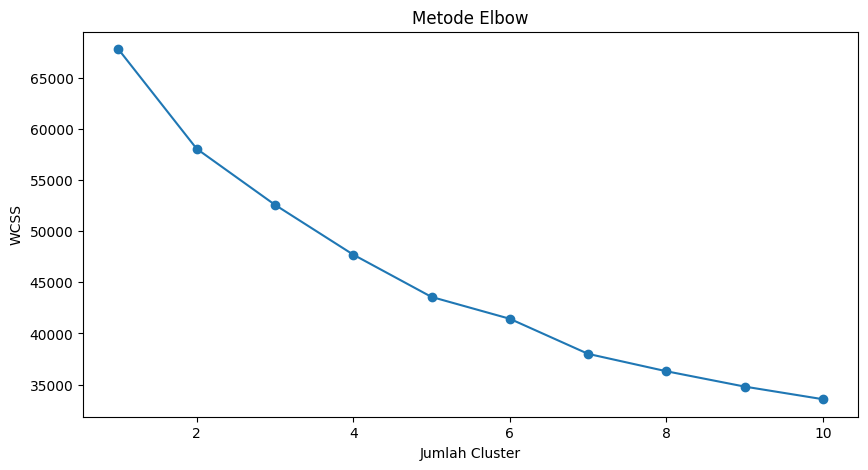

In [ ]:
# Metode Elbow untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

1. Metode Elbow membantu kita menentukan jumlah klaster yang optimal dengan melihat di mana penurunan nilai inertia mulai melambat atau membentuk "siku" (elbow) pada grafik. Pada titik ini, penambahan klaster tambahan tidak lagi memberikan penurunan inertia yang signifikan.
2. Tujuan utamanya adalah untuk memilih jumlah klaster yang memberikan keseimbangan antara kompleksitas model dan kemampuan model untuk memahami struktur intrinsik dalam data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

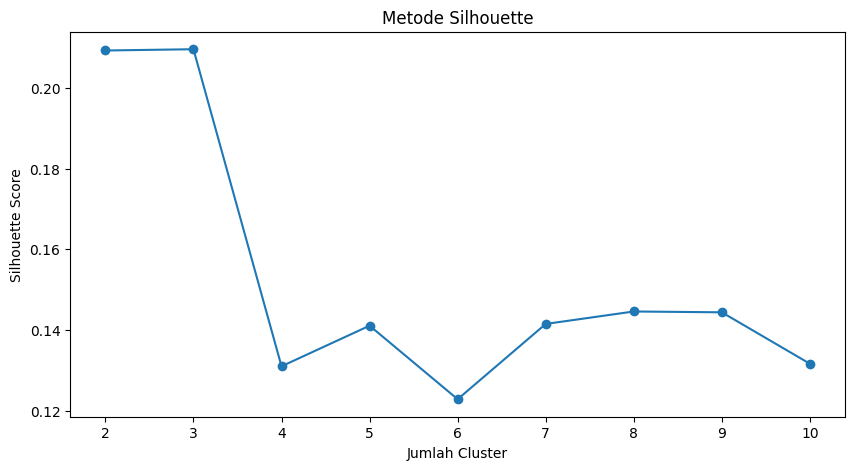

In [ ]:
# Metode Silhouette untuk menentukan jumlah cluster yang optimal
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Metode Silhouette')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

1. Metode Silhouette digunakan untuk mengevaluasi seberapa baik setiap objek telah ditempatkan dalam klasternya masing-masing. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan klaster yang lebih baik terpisah satu sama lain.
2. Tujuan dari plot ini adalah untuk memilih jumlah klaster yang memberikan nilai Silhouette Score tertinggi, menunjukkan klasterisasi yang lebih baik dan lebih terpisah.

In [ ]:
# Menentukan jumlah cluster yang optimal dari hasil metode Elbow dan Silhouette
optimal_clusters_elbow = 4  # Tentukan berdasarkan plot Elbow
optimal_clusters_silhouette = 3  # Tentukan berdasarkan plot Silhouette

# Menjalankan K-Means clustering dengan jumlah cluster yang optimal
kmeans_optimal = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
y_kmeans = kmeans_optimal.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1. Dengan menentukan jumlah klaster yang optimal berdasarkan metode Elbow dan Silhouette, kita dapat memilih konfigurasi klaster yang diharapkan dapat memberikan hasil klasterisasi yang baik.
2. Dengan menjalankan K-Means clustering menggunakan jumlah klaster optimal ini, kita dapat mengklasifikasikan setiap sampel dalam dataset ke dalam klaster yang sesuai berdasarkan fitur-fitur yang telah dinormalisasi.

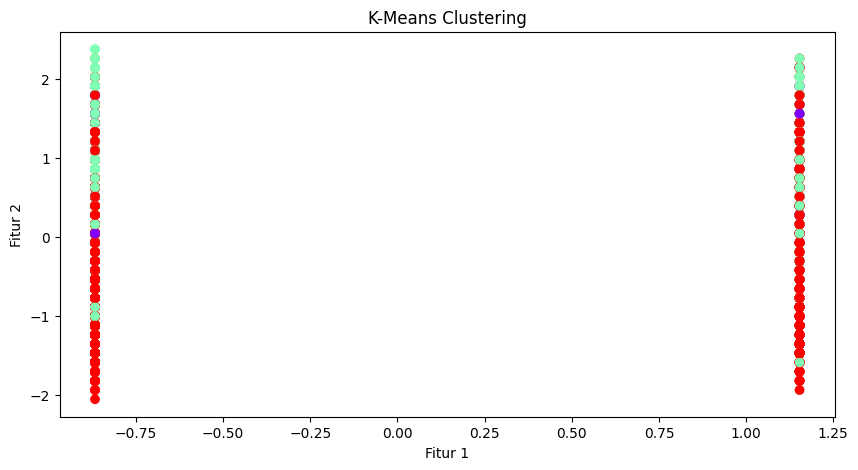

In [ ]:
# Menambah hasil clustering ke dataframe asli
data['Cluster'] = y_kmeans

# Plot hasil clustering (menggunakan dua fitur pertama untuk visualisasi)
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

1. Dengan menambahkan kolom 'Cluster' ke dataframe asli, Anda dapat dengan mudah menganalisis dan memahami distribusi data berdasarkan klaster yang telah dibentuk.
2. Plot hasil clustering membantu Anda memvisualisasikan bagaimana model K-Means telah mengelompokkan data dalam ruang fitur yang telah dinormalisasi. Dengan menggunakan colormap, plot ini memungkinkan Anda untuk melihat pola dan pemisahan antar-klaster dengan jelas.